# Data Analysis: LeNet-5 x FashionMNIST

*Version History*

* **4.0** - Analyze results of grid search (*batch size* x *learning rate*)


## Imports

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties

from src.utils.utils import parse_log_dir, get_training_results, get_training_durations
from src.visualization.color import get_tinted_color
from src.visualization.utils import save_figure

## Grid Search: Batch Size x Learning Rate


### Analyze Training Results

In [2]:
# Load and parse results
log_dir = "../out/lenet_fashionmnist/grid_search/batch_size_lr/2024-09-03_22-52-15"
b_lr = parse_log_dir(
    log_dir,
    get_training_results,
    mode="Val"
)

# Abbreviate column names
b_lr = b_lr.rename(columns={
    "Accuracy@1": "Acc@1",
    "Accuracy@5": "Acc@5"
})

# Display overall results
b_lr

,b,lr,Epochs,Loss,Acc@1,Acc@5
0,8,0.001,12,0.288,0.896,0.999
1,8,0.010,8,0.371,0.871,0.998
2,8,0.100,4,2.315,0.100,0.500
3,16,0.001,16,0.293,0.895,0.998
4,16,0.010,4,0.328,0.878,0.998
5,16,0.100,2,2.308,0.100,0.500
6,32,0.001,30,0.298,0.896,0.998
7,32,0.010,12,0.306,0.894,0.999
8,32,0.100,15,0.875,0.665,0.987
9,64,0.001,26,0.317,0.884,0.998


In [3]:
# Group results by learning rate
grouped_by_lr = b_lr.groupby("lr")
col_order = ["b", "Acc@1", "Loss", "Epochs"]  # Dropping Acc@5, since it does not provide any added information

# Display results grouped by learning rate
for lr, group in grouped_by_lr:
    print(f"\033[1mLEARNING RATE: {lr}\033[0m")
    print(group[col_order].to_string(index=False))
    print("\n")

LEARNING RATE: 0.001
   b  Acc@1  Loss  Epochs
   8  0.896 0.288      12
  16  0.895 0.293      16
  32  0.896 0.298      30
  64  0.884 0.317      26
 128  0.881 0.328      40
 256  0.877 0.339      64
 512  0.862 0.390      67
1024  0.848 0.429     100
2048  0.795 0.564      99
4096  0.737 0.694      98


LEARNING RATE: 0.01
   b  Acc@1  Loss  Epochs
   8  0.871 0.371       8
  16  0.878 0.328       4
  32  0.894 0.306      12
  64  0.896 0.292      10
 128  0.892 0.303      13
 256  0.890 0.304      17
 512  0.895 0.298      35
1024  0.887 0.314      46
2048  0.871 0.355      44
4096  0.874 0.349      92


LEARNING RATE: 0.1
   b  Acc@1  Loss  Epochs
   8  0.100 2.315       4
  16  0.100 2.308       2
  32  0.665 0.875      15
  64  0.851 0.432      13
 128  0.876 0.342      10
 256  0.879 0.332      17
 512  0.888 0.319      17
1024  0.883 0.321      21
2048  0.880 0.339      38
4096  0.541 1.366       1




In [4]:
# Group results by batch size
grouped_by_b = b_lr.groupby("b")
col_order = ["lr", "Acc@1", "Loss", "Epochs"]  # Dropping Acc@5, since it does not provide any added information

# Display results grouped by batch size
for b, group in grouped_by_b:
    print(f"\033[1mBATCH SIZE: {b}\033[0m")
    print(group[col_order].to_string(index=False))
    print("\n")

BATCH SIZE: 8
   lr  Acc@1  Loss  Epochs
0.001  0.896 0.288      12
0.010  0.871 0.371       8
0.100  0.100 2.315       4


BATCH SIZE: 16
   lr  Acc@1  Loss  Epochs
0.001  0.895 0.293      16
0.010  0.878 0.328       4
0.100  0.100 2.308       2


BATCH SIZE: 32
   lr  Acc@1  Loss  Epochs
0.001  0.896 0.298      30
0.010  0.894 0.306      12
0.100  0.665 0.875      15


BATCH SIZE: 64
   lr  Acc@1  Loss  Epochs
0.001  0.884 0.317      26
0.010  0.896 0.292      10
0.100  0.851 0.432      13


BATCH SIZE: 128
   lr  Acc@1  Loss  Epochs
0.001  0.881 0.328      40
0.010  0.892 0.303      13
0.100  0.876 0.342      10


BATCH SIZE: 256
   lr  Acc@1  Loss  Epochs
0.001  0.877 0.339      64
0.010  0.890 0.304      17
0.100  0.879 0.332      17


BATCH SIZE: 512
   lr  Acc@1  Loss  Epochs
0.001  0.862 0.390      67
0.010  0.895 0.298      35
0.100  0.888 0.319      17


BATCH SIZE: 1024
   lr  Acc@1  Loss  Epochs
0.001  0.848 0.429     100
0.010  0.887 0.314      46
0.100  0.883 0.321      2

### Analyze Training Durations

In [5]:
# Load and parse training durations (seconds per epoch for each individual epoch)
training_durations = parse_log_dir(log_dir, get_training_durations)

# Compute mean and standard error per batch size
duration_stats = training_durations.groupby("b")["duration"].agg(["mean", "sem"]).reset_index()

# Find best learning rate per batch size (in terms of loss) and corresponding number of epochs trained for
best_lr = b_lr.loc[b_lr.groupby("b")["Loss"].idxmin(), ["b", "lr", "Epochs"]]
duration_stats = pd.merge(duration_stats, best_lr, on="b")
duration_stats = duration_stats.rename(columns={
    "mean": "Mean",
    "sem": "SEM",
    "lr": "Best lr"
})

# Display results
duration_stats

,b,Mean,SEM,Best lr,Epochs
0,8,56.019923,0.192281,0.001,12
1,16,32.885595,0.246686,0.001,16
2,32,17.939264,0.018054,0.001,30
3,64,11.052156,0.010747,0.010,10
4,128,8.205487,0.006392,0.010,13
5,256,6.649885,0.003555,0.010,17
6,512,5.963813,0.003601,0.010,35
7,1024,5.446548,0.002352,0.010,46
8,2048,5.192625,0.002385,0.100,38
9,4096,4.960276,0.001986,0.010,92


### Visualize Training Durations

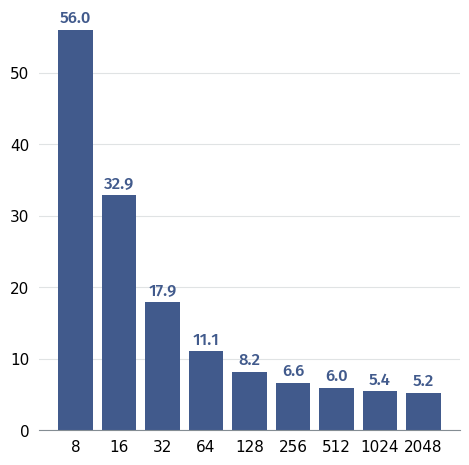

In [6]:
# Exclude batch size of 4096 from results
filtered_duration_stats = duration_stats[duration_stats["b"] != 4096]

# Initialize plot
fig_secs_per_epoch, ax = plt.subplots()
plt.tight_layout()
ax.set_box_aspect(1)
plt.rc('font', family='Fira Sans')

# Remove left, top, and right spines (figure borders)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Change color of bottom spine
ax.spines['bottom'].set_color(get_tinted_color("anthracite", tint=0.4))

# Add grid
ax.xaxis.grid(False)
ax.yaxis.grid(color=get_tinted_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Plot data
bars = ax.bar(
    x=np.arange(filtered_duration_stats["Mean"].size),
    height=filtered_duration_stats["Mean"],
    color=get_tinted_color("tory-blue"),
    tick_label=filtered_duration_stats["b"]
)

# Add text annotations to top of bars
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 1,
      round(bar.get_height(), 1),
      horizontalalignment="center",
      color=bar.get_facecolor(),
      fontweight="roman",
      fontsize=12
  )

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

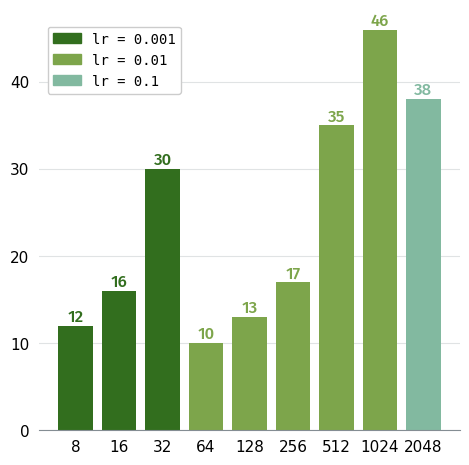

In [7]:
# Initialize plot
fig_num_epochs, ax = plt.subplots()
plt.tight_layout()
ax.set_box_aspect(1)
plt.rc('font', family='Fira Sans')

# Remove left, top, and right spines (figure borders)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Change color of bottom spine
ax.spines['bottom'].set_color(get_tinted_color("anthracite", tint=0.4))

# Add grid
ax.xaxis.grid(False)
ax.yaxis.grid(color=get_tinted_color("anthracite", tint=0.85))
ax.set_axisbelow(True)

# Remove ticks & change size of tick labels
ax.tick_params(
    bottom=False,
    left=False,
    labelsize=11
)

# Create color map to distinguish runs corresponding to different lr
lr_to_color_map = {
    0.001: get_tinted_color("bilbao"),
    0.01: get_tinted_color("chelsea-cucumber"),
    0.1: get_tinted_color("padua")
}

# Plot data
bars = ax.bar(
    x=np.arange(filtered_duration_stats["Mean"].size),
    height=filtered_duration_stats["Epochs"],
    color=[lr_to_color_map[lr] for lr in filtered_duration_stats["Best lr"]],
    tick_label=filtered_duration_stats["b"]
)

# Add text annotations to top of bars
for bar in bars:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.5,
      round(bar.get_height(), 1),
      horizontalalignment="center",
      color=bar.get_facecolor(),
      fontweight="roman",
      fontsize=12
  )

# Add legend
font_properties = FontProperties(family='monospace')
handles = [plt.Rectangle((0, 0), 1, 1, color=lr_to_color_map[lr]) for lr in lr_to_color_map]
labels = [f"lr = {lr}" for lr in lr_to_color_map]
legend = ax.legend(handles, labels, prop=font_properties, loc=(0.02, 0.8))
legend.get_frame().set_alpha(1)

# Show plot
plt.show()

# Restore defaults
plt.rcdefaults()

In [8]:
# Save figures
dir_name = Path("../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr")
save_figure(fig_secs_per_epoch, dir_name / "seconds_per_epoch.png")
save_figure(fig_num_epochs, dir_name / "num_epochs_vs_batch_size.png")

Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr/seconds_per_epoch.png.
Figure saved successfully as ../reports/figures/lenet_fashionmnist/grid_search/batch_size_lr/num_epochs_vs_batch_size.png.
